In [82]:
#import necessary libraries
import numpy as np
import tensorflow as tp
from tensorflow.keras import datasets, layers, models   #layers used to add layers to cnn,model used to define and compile neural network models
from tensorflow.keras.utils import to_categorical #converts labels
import matplotlib.pyplot as plt

In [52]:
#load the mnist dataset
(train_images,train_labels),(test_images,test_labels)=datasets.mnist.load_data()

In [54]:
#preprocessing:normalize the pixel values to be betweem 0 and 1
train_images = train_images/255.0
test_images = test_images/255.0

In [58]:
#reshape the images to (28,28,1) as they are grayscale(height,width,onecolor channel)

train_images= train_images.reshape((train_images.shape[0],28,28,1))
test_images= test_images.reshape((test_images.shape[0],28,28,1))

In [60]:
#convert the labels to one -hot encoded form
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [62]:
#building cnn model
model=models.Sequential()

In [64]:
#first convolutional layer
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
#it access convo2d 32-no of filters to apply,3,3-size of each filter,activation-activation function

In [66]:
model.add(layers.MaxPooling2D((2,2)))#helps todetect important features

In [68]:
#second convolution layer
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

In [70]:
#third
model.add(layers.Conv2D(64,(3,3),activation='relu'))

In [72]:
#flatten the 3d output to 1d and add a Dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64,activation='relu'))

In [74]:
#output layer with 10 neurons(for 10 digit classes)
model.add(layers.Dense(10,activation='softmax'))

In [76]:
#compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])#adam optimizer for adaptive learning,crossentropy for multiclass classificationn

In [78]:
model.fit(train_images,train_labels,epochs=5,batch_size=64,validation_data=(test_images,test_labels))
#epochs means model will see training data 5 times,batch size is no of samples processed


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 43s 41ms/step - accuracy: 0.8680 - loss: 0.4303 - val_accuracy: 0.9847 - val_loss: 0.0491
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 40ms/step - accuracy: 0.9836 - loss: 0.0532 - val_accuracy: 0.9883 - val_loss: 0.0356
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 39s 41ms/step - accuracy: 0.9885 - loss: 0.0366 - val_accuracy: 0.9842 - val_loss: 0.0508
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.9914 - loss: 0.0287 - val_accuracy: 0.9894 - val_loss: 0.0331
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 36s 38ms/step - accuracy: 0.9931 - loss: 0.0217 - val_accuracy: 0.9890 - val_loss: 0.0367


In [80]:
#evaluate the model on test data
test_loss,test_acc=model.evaluate(test_images,test_labels)
print(f"test accuracy:{test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9863 - loss: 0.0490
test accuracy:98.90%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step
Prediction for first image:4


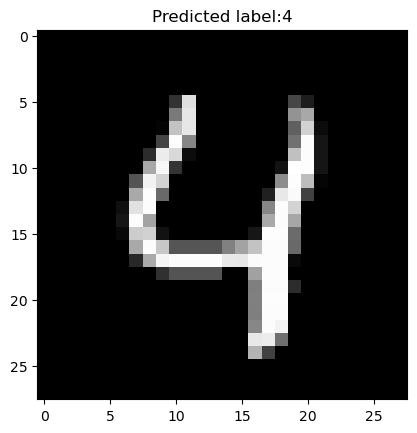

In [96]:

#make predictions on test images
predictions=model.predict(test_images)
print(f"Prediction for first image:{np.argmax(predictions[4])}")
plt.imshow(test_images[4].reshape(28,28),cmap='gray')
plt.title(f"Predicted label:{predictions[4].argmax()}")
plt.show()
